Remake some figures with minimum fontsize 24 for a presentation

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import math

In [2]:
from sys import platform
if platform == "linux" or platform == "linux2":
    data_string = "/home/maria/Documents/data/pied_piper/"
    output_string = "/home/maria/Documents/output/pied_piper/"

elif platform == "win32"or platform == "win64":
    data_string = "C:/Users/maria/OneDrive/Documents/data/pied_piper/"
    output_string = "C:/Users/maria/OneDrive/Documents/output/pied_piper/"

In [5]:
csv_name = data_string + "dungeness/dungeness_subset_covariates.csv"
df = pd.read_csv(csv_name, header=0)
df.head()

#groupby day of year
groupedby_doy = df.groupby(by=["doy"]).agg({'chinook0_hatchery_perhour':'mean',
                                            'chinook0_wild_perhour':'mean',
                                            'chinook1_hatchery_perhour':'mean',
                                            'chinook1_wild_perhour':'mean',
                                            'coho1_hatchery_perhour':'mean',
                                            'coho1_wild_perhour':'mean',
                                            'steelheadsmolt_hatchery_perhour':'mean',
                                            'steelheadsmolt_wild_perhour':'mean',
                                            'temp':'mean',
                                            'flow':'mean'})

#moving average

#chinook0
groupedby_doy['ma_chinook0_wild_perhour'] = groupedby_doy['chinook0_wild_perhour'].rolling(7, min_periods=1, center=True).mean()
groupedby_doy['ma_chinook0_hatchery_perhour'] = groupedby_doy['chinook0_hatchery_perhour'].rolling(7, min_periods=1, center=True).mean()

#chinook1
groupedby_doy['ma_chinook1_wild_perhour'] = groupedby_doy['chinook1_wild_perhour'].rolling(7, min_periods=1, center=True).mean()
groupedby_doy['ma_chinook1_hatchery_perhour'] = groupedby_doy['chinook1_hatchery_perhour'].rolling(7, min_periods=1, center=True).mean()

#coho1
groupedby_doy['ma_coho1_wild_perhour'] = groupedby_doy['coho1_wild_perhour'].rolling(7, min_periods=1, center=True).mean()
groupedby_doy['ma_coho1_hatchery_perhour'] = groupedby_doy['coho1_hatchery_perhour'].rolling(7, min_periods=1, center=True).mean()

#steelhead
groupedby_doy['ma_steelheadsmolt_wild_perhour'] = groupedby_doy['steelheadsmolt_wild_perhour'].rolling(7, min_periods=1, center=True).mean()
groupedby_doy['ma_steelheadsmolt_hatchery_perhour'] = groupedby_doy['steelheadsmolt_hatchery_perhour'].rolling(7, min_periods=1, center=True).mean()

#environment
groupedby_doy['ma_temp'] = groupedby_doy['temp'].rolling(7, min_periods=1, center=True).mean()
groupedby_doy['ma_flow'] = groupedby_doy['flow'].rolling(7, min_periods=1, center=True).mean()



In [33]:

def plot_by_day_together():
    species = "chinook"
    year = "0"
#     x_string_wild = species + year + '_Wild' +'_prop_mean'
    
#     x_string_hat = species + year + '_Hat' +'_prop_mean'
#     std_string_wild = species + year + '_Wild' +'_prop_std'
#     std_string_hat = species + year + '_Hat' +'_prop_std'
    
    fs = 24
    lw = 3
    transparency = 0.5
    plt.close('all') # always start by cleaning up
    fig, axs = plt.subplots(2, 2,figsize=(16,9))

    #ax1 = fig.add_subplot(111)
    string1 = species + year + "_wild_perhour"
    string2 = species + year + "_hatchery_perhour"
    string_ma = "ma_"+ species + year + "_wild_perhour"
    
    for i in range(2005,2020):
        axs[0,0].plot(
            df['doy'][df['year'] == i], df[string1][df['year'] == i], color = 'gray',
            alpha = 0.3, linewidth = lw*0.5)
        axs[1,0].plot(
            df['doy'][df['year'] == i], df[string2][df['year'] == i], color = 'cadetblue',
            alpha = 0.9, linewidth = lw*0.5)
    axs[0,0].plot(
        groupedby_doy.index, groupedby_doy[string_ma], color = 'salmon', 
        label = 'moving average', alpha = 1, linewidth = lw)
    axs[0,0].axvline(130, c="black", alpha=1)
    axs[0,0].axvline(200, c="black", alpha=1)
    xfmt = mdates.DateFormatter('%b')
    months = mdates.MonthLocator()
    axs[0,0].xaxis.set_major_locator(months)
    axs[0,0].xaxis.set_major_formatter(xfmt)
    axs[0,0].tick_params(labelsize=.8*fs)
    axs[0,0].set_title("Chinook subyearlings", loc='left', fontsize = fs)
    axs[0,0].set_ylabel('Number of wild\nfish per hour', fontsize = fs)
    
    axs[1,0].xaxis.set_major_locator(months)
    axs[1,0].xaxis.set_major_formatter(xfmt)
    axs[1,0].tick_params(labelsize=.8*fs)
#     axs[1,0].set_title('Hatchery', loc='left', fontsize = fs*0.9)
    axs[1,0].set_ylabel('Number of hatchery\nfish per hour', fontsize = fs)
    
    
    #coho1
    species = "coho"
    year = "1"
    #ax1 = fig.add_subplot(111)
    string1 = species + year + "_wild_perhour"
    string2 = species + year + "_hatchery_perhour"
    string_ma = "ma_"+ species + year + "_wild_perhour"
    
    for i in range(2005,2020):
        axs[0,1].plot(
            df['doy'][df['year'] == i], df[string1][df['year'] == i], color = 'gray',
            alpha = 0.3, linewidth = lw*0.5)
        axs[1,1].plot(
            df['doy'][df['year'] == i], df[string2][df['year'] == i], color = 'cadetblue',
            alpha = 0.9, linewidth = lw*0.5)
    axs[0,1].plot(
        groupedby_doy.index, groupedby_doy[string_ma], color = 'salmon', 
        label = 'moving average', alpha = 1, linewidth = lw)
    axs[0,1].axvline(120, c="black", alpha=1)
    axs[0,1].axvline(160, c="black", alpha=1)
    xfmt = mdates.DateFormatter('%b')
    months = mdates.MonthLocator()
    axs[0,1].xaxis.set_major_locator(months)
    axs[0,1].xaxis.set_major_formatter(xfmt)
#     plt.xlabel('Day of year', size = 1.2*fs)
#     plt.ylabel(species + ' ' + year+ ' '  +'counts per hour', size = 1.2*fs)
    axs[0,1].tick_params(labelsize=.8*fs)
    axs[0,1].set_title("Coho yearlings", loc='left', fontsize = fs)
    axs[1,1].xaxis.set_major_locator(months)
    axs[1,1].xaxis.set_major_formatter(xfmt)
    axs[1,1].tick_params(labelsize=.8*fs)
    plt.savefig(output_string + "dungeness/fish_per_hour_seasonal_MARSS_doy.jpeg", dpi = 300)
    plt.show()
    

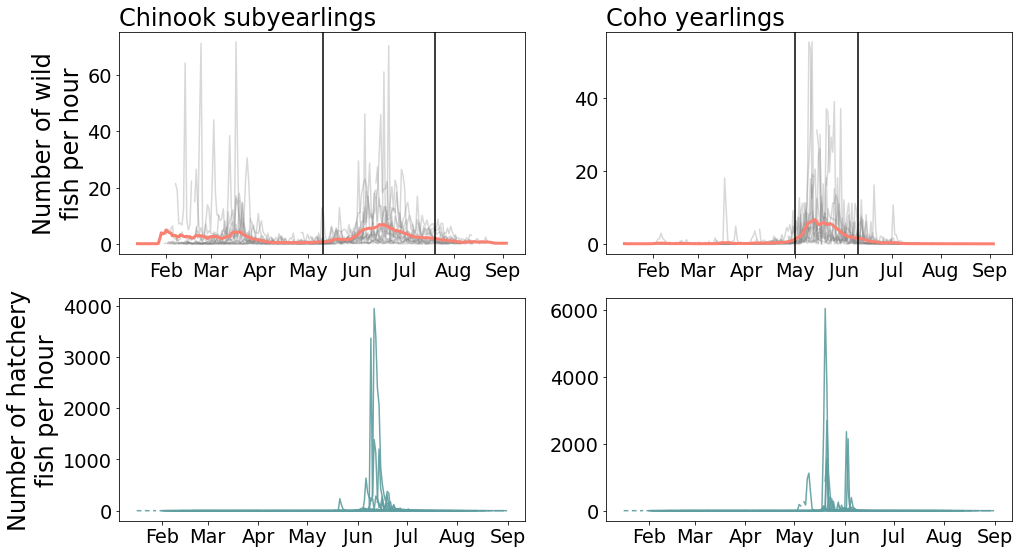

In [34]:
plot_by_day_together()

In [40]:
csv_name = data_string + "dungeness/dungeness_all_days_hatchery_release_new.csv"
df = pd.read_csv(csv_name, header=0)
df['Date'] = pd.to_datetime(df['Date'])

In [112]:
def hatchery_visualization_presentation(species_age="chinook0", hatchery_prop=True):
    string_hatchery = species_age + "_hatchery_total_release"
    string_hatchery_perhour = species_age + "_hatchery_perhour"
    string_wild_perhour = species_age + "_wild_perhour"
    string_prop = species_age + "_untagged_unclipped_prop"

    species_list = df['Date'][~np.isnan(df[string_hatchery])]
    total_number_releases = len(species_list)
    count = 0
    for i, j in enumerate(species_list):
        index = species_list.index[i]
        if i < total_number_releases - 1:
            next_index = species_list.index[i + 1]
            days_inbetween = (species_list[next_index] - j).days
            if days_inbetween < 50:
                continue
            else:
                count = count + 1

    total_plots = count + 1

    fig = plt.figure(figsize=(17, 17) )
    if species_age == "coho1":
        title = "Coho yearlings"
    elif species_age == "chinook0":
        title = "Chinook subyearlings"
    elif species_age == "steelheadsmolt":
        title = "Steelhead smolts"
    plt.suptitle(title, fontsize = 24*1.5)
    outer = gridspec.GridSpec(math.ceil(total_plots / 3), 3, wspace=0.3, hspace=0.4)

    count_releases = 0
    count_plot = 0
    line_handles = []  # List to hold line handles
    line_labels = []  # List to hold line labels

    # loop over all releases
    for i, j in enumerate(species_list):
        index = species_list.index[i]
        if count_releases > 0:
            count_releases = count_releases - 1
            continue
        else:
            if i < total_number_releases - 1:
                indices = species_list.index[i + 1:]
                count_releases = 0
                release_list = [index]
                for k in indices:
                    days_inbetween = (species_list[k] - j).days
                    if days_inbetween < 50:
                        count_releases = count_releases + 1
                        release_list.append(k)
            else:
                release_list = [index]

        window = 40
        hatchery = df[string_hatchery_perhour][release_list[0]-10:release_list[0] + window]
        wild = df[string_wild_perhour][release_list[0]-10:release_list[0] + window]

        if np.isnan(hatchery).all():
            continue

        inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                                                 subplot_spec=outer[count_plot], wspace=0.1, hspace=0.4)
        count_plot = count_plot + 1

        for j in range(2):
            ax = plt.Subplot(fig, inner[j])
            if j == 0:
                line, = ax.plot(range(-10,window),
                                df[string_hatchery_perhour][release_list[0]-10:release_list[0] + window],
                                "cadetblue")
                ax.set_title((df['Date'].dt.year[release_list[0]]),  fontsize = 18,fontweight="bold")
                label = "Hatchery"
            else:
                line, = ax.plot(range(-10,window),
                                df[string_wild_perhour][release_list[0]-10:release_list[0] + window],
                                "salmon")
                label = "Wild"
                if hatchery_prop:
                    plt.axvline(x=0, c="black", alpha=0.5)
                    
                    if len(release_list) > 1:
                        count_release_list = 0
                        days_after_first_release = 0
                        for release_list_i in release_list:
                            prop = df[string_prop][release_list_i]
                            count_release_list = count_release_list + 1

                            if count_release_list > 1:
                                plt.axvline(days_after_first_release + release_list_i - previous_release,
                                            c="black", alpha=0.5)

                                days_after_first_release = (days_after_first_release +
                                                           release_list_i - previous_release)

                            previous_release = release_list_i

            if i == 0:
                line_handles.append(line)  # Add line handle to list
                line_labels.append(label)  # Add line label to list
                
            fig.add_subplot(ax)

    fig.supxlabel("Days after first hatchery release", fontsize = 24*1.5)
    fig.supylabel("Fish per hour", fontsize = 24*1.5)

    # Add common legend
    fig.legend(line_handles, line_labels, loc='center', bbox_to_anchor=(0.5, 0.08), ncol=len(line_handles), 
               fontsize = 24*1.5)
    
    
    plt.savefig(output_string + species_age + '_hatchery_wild_each_year_presentation_' + str(hatchery_prop) + '.jpeg',
                dpi=500)


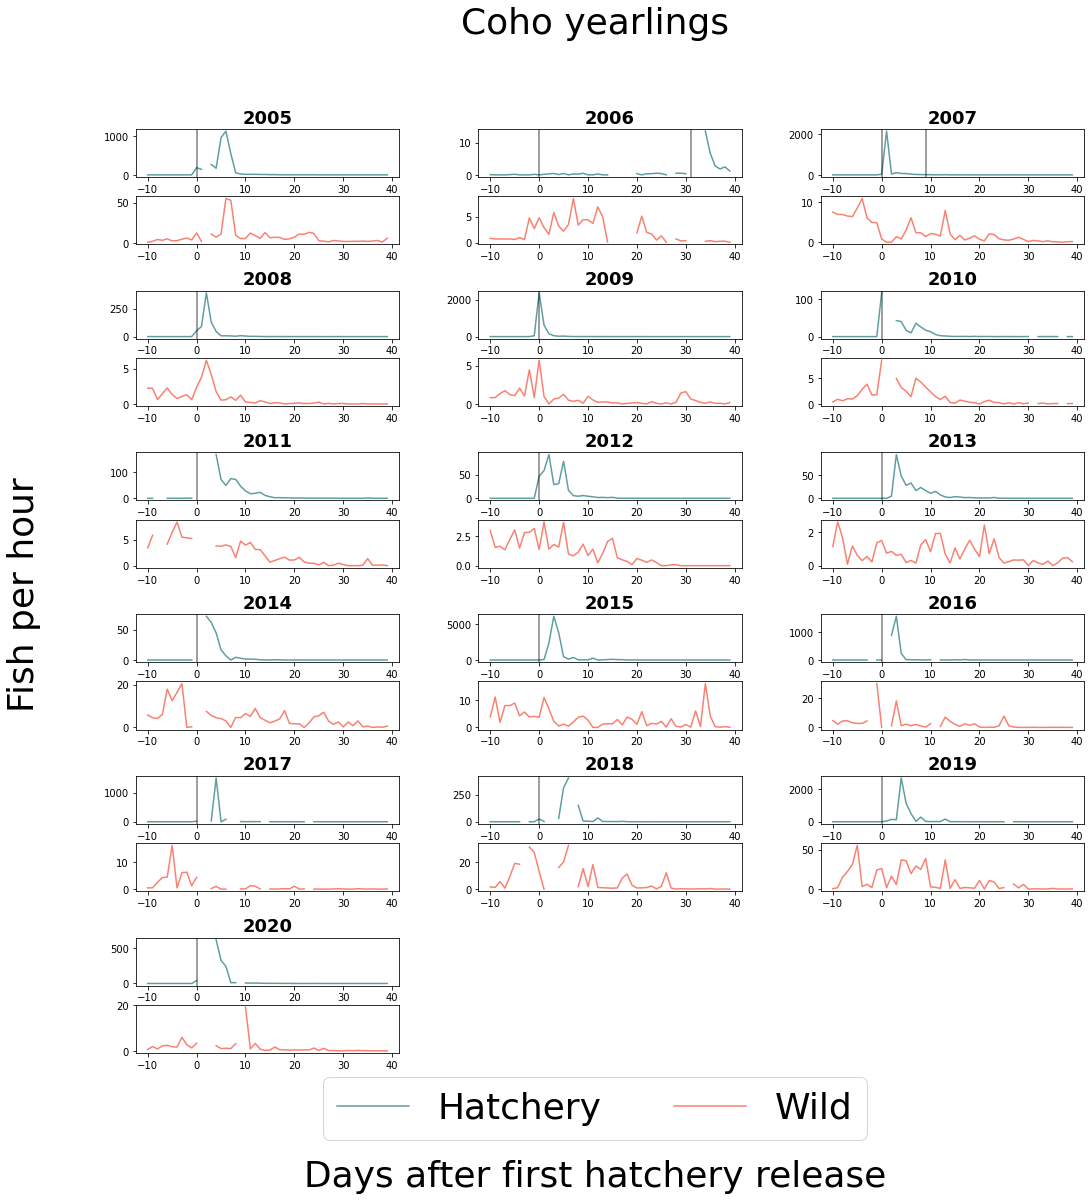

In [114]:
hatchery_visualization_presentation("coho1", True)